In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')


# Database

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# Data Cleaning

In [4]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df.info()
# Missing values in total charges

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

# Missing values in Total charges is replaced by corresponding Monthly Charges*Tenure

In [6]:
# Total charges = Monthly charges * Tenure
df['TotalCharges'].fillna(df['MonthlyCharges']*df['tenure'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

# DATA DESCRIPTION

In [7]:
print("NO OF CUSTOMERS: ",df['customerID'].nunique())
print("NO OF MALE CUST: ",df['gender'].value_counts()[0])
print("NO OF FEMALE CUST : ",df['gender'].value_counts()[1])
print("NO OF SENIOR CUSTOMERS: ",df['SeniorCitizen'].value_counts()[1])


NO OF CUSTOMERS:  7043
NO OF MALE CUST:  3555
NO OF FEMALE CUST :  3488
NO OF SENIOR CUSTOMERS:  1142


# Data Features

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Categorical Features

In [9]:
for i in df.columns[1:]:
    if i not in ['tenure','MonthlyCharges','TotalCharges']:
        print(i,df[i].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [10]:
df.describe()['TotalCharges']

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [11]:
df.describe()['MonthlyCharges']


count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

# Top Customers

In [12]:
df.sort_values(['MonthlyCharges','tenure'],ascending=[False,False]).head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
2115,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
3894,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
4804,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
5127,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes


In [13]:
df['tenure'].max()


72

# Data VISUALIZATION

Text(0.5, 0, 'YES - 1  NO - 0')

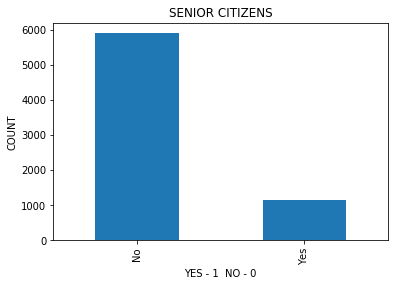

In [14]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})
df.SeniorCitizen.value_counts().plot(kind='bar')
plt.title('SENIOR CITIZENS')
plt.ylabel('COUNT')
plt.xlabel('YES - 1  NO - 0')

Text(0.5, 1.0, 'COUNT OF PARTNER/NON PARTNER')

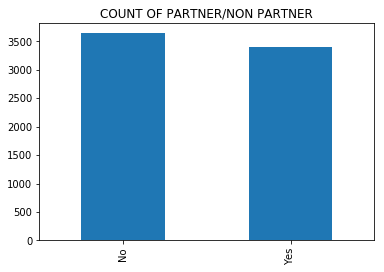

In [15]:
df.Partner.value_counts().plot(kind='bar')
plt.title('COUNT OF PARTNER/NON PARTNER')

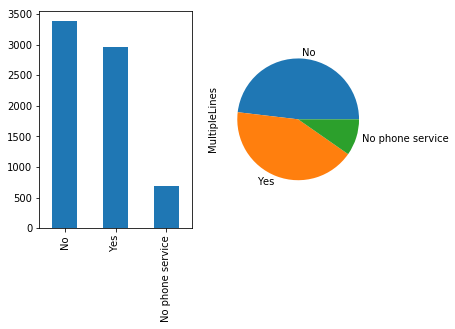

In [16]:
fig,axs=plt.subplots(1,2)
df.MultipleLines.value_counts().plot(kind='bar',ax=axs[0])
df.MultipleLines.value_counts().plot(kind='pie',ax=axs[1])

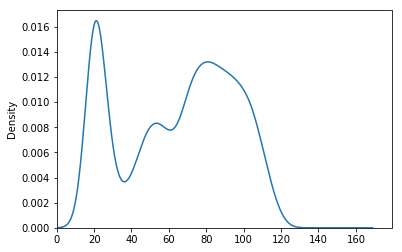

In [44]:
df['MonthlyCharges'].plot(kind='density',xlim=0,ylim=0)


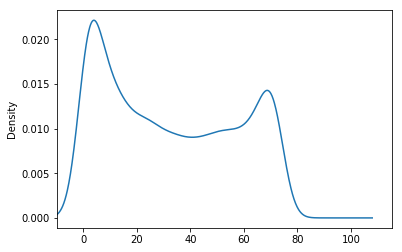

In [71]:
df['tenure'].plot(kind='density',xlim=-10)

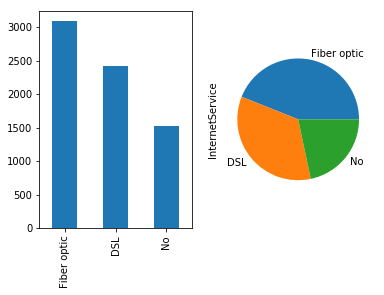

In [18]:
fig,axs=plt.subplots(1,2)
df.InternetService.value_counts().plot(kind='bar',ax=axs[0])
df.InternetService.value_counts().plot(kind='pie',ax=axs[1])

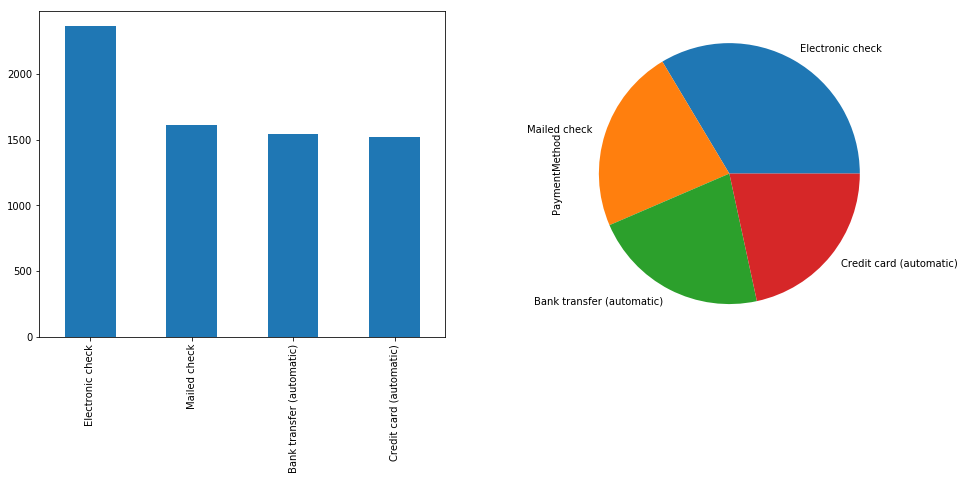

In [19]:
fig,axs=plt.subplots(1,2)
df.PaymentMethod.value_counts().plot(kind='bar',ax=axs[0],figsize=(16,6))
df.PaymentMethod.value_counts().plot(kind='pie',ax=axs[1])

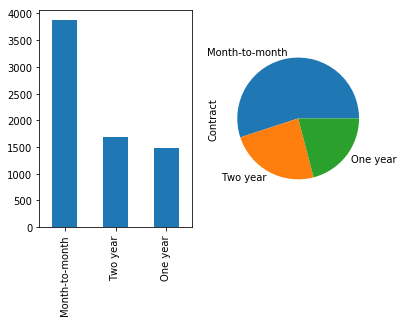

In [20]:
fig,axs=plt.subplots(1,2)
df.Contract.value_counts().plot(kind='bar',ax=axs[0])
df.Contract.value_counts().plot(kind='pie',ax=axs[1])

No     5174
Yes    1869
Name: Churn, dtype: int64

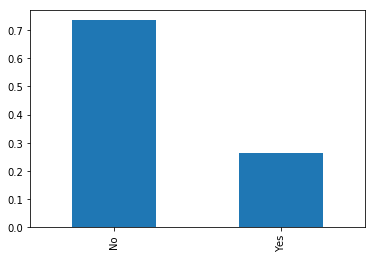

In [21]:
df.Churn.value_counts(normalize=True).plot(kind='bar')
df['Churn'].value_counts()

In [22]:
print("% Customers that Churn : ",100*df['Churn'].value_counts()[1]/(df['Churn'].value_counts()[0]+df['Churn'].value_counts()[1]))

% Customers that Churn :  26.536987079369588


# 26.54 % of the Customer database churn 

# INSIGHTS FROM THE DATA

# Churn VS Gender

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: gender, dtype: int64


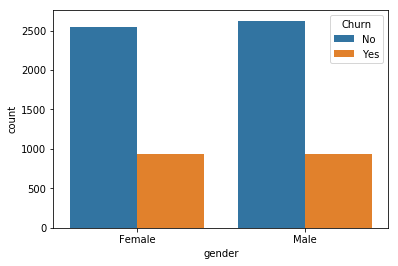

In [23]:
print(df.groupby('Churn')['gender'].value_counts())
sns.countplot(df.gender, hue = df.Churn)

# From churn vs gender, its found that there is no correlation between churn and gender ( Churn of M and F are almost the same)

# Churn VS PHONE SERVICE

Churn  PhoneService
No     Yes             4662
       No               512
Yes    Yes             1699
       No               170
Name: PhoneService, dtype: int64
% Churn with PhoneService =  26.709636849551956
% Churn without PhoneService=  24.926686217008797


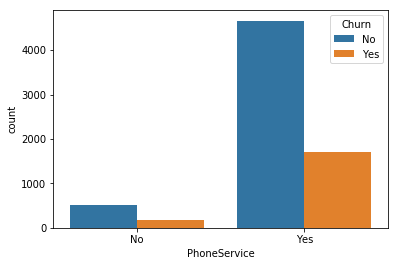

In [24]:
sns.countplot(df.PhoneService, hue = df.Churn)
print(df.groupby('Churn')['PhoneService'].value_counts())
k=(df.groupby('Churn')['PhoneService'].value_counts()['Yes']['Yes'])*100/(df.groupby('Churn')['PhoneService'].value_counts()['No']['Yes']+df.groupby('Churn')['PhoneService'].value_counts()['Yes']['Yes'])
print('% Churn with PhoneService = ',k)
q=(df.groupby('Churn')['PhoneService'].value_counts()['Yes']['No'])*100/(df.groupby('Churn')['PhoneService'].value_counts()['No']['No']+df.groupby('Churn')['PhoneService'].value_counts()['Yes']['No'])
print('% Churn without PhoneService= ',q)


# Customers with and without Phone Service have similar Churn Rate

# Churn VS Dependents

Churn  Dependents
No     No            3390
       Yes           1784
Yes    No            1543
       Yes            326
Name: Dependents, dtype: int64
% Dependents that stay after 1 month =  84.54976303317535


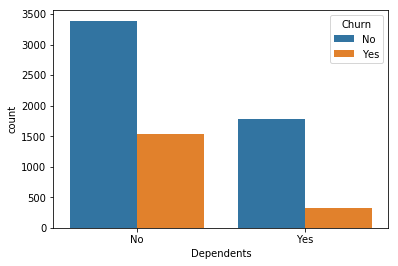

In [25]:
sns.countplot(df.Dependents, hue = df.Churn)
print(df.groupby('Churn')['Dependents'].value_counts())
k=(df.groupby('Churn')['Dependents'].value_counts()['Yes']['Yes'])*100/(df.groupby('Churn')['Dependents'].value_counts()['No']['Yes']+df.groupby('Churn')['Dependents'].value_counts()['Yes']['Yes'])
print('% Dependents that stay after 1 month = ',100-k)

# 84.54% Customers with Dependents stay for the next month

# Churn VS InternetConnection

Churn  InternetService
No     DSL                1962
       Fiber optic        1799
       No                 1413
Yes    Fiber optic        1297
       DSL                 459
       No                  113
Name: InternetService, dtype: int64


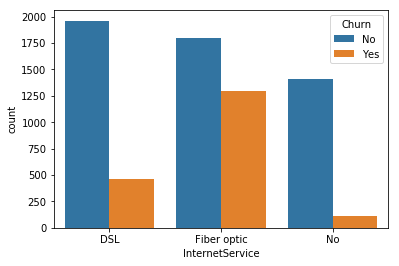

In [26]:
#print(df.groupby('Churn')['InternetService'].value_counts().plot(kind='barh'))
sns.countplot(df.InternetService, hue = df.Churn)
print(df.groupby('Churn')['InternetService'].value_counts())


# FiberOptic Service has highest churn rate

# Churn VS Partner

Churn  Partner
No     Yes        2733
       No         2441
Yes    No         1200
       Yes         669
Name: Partner, dtype: int64
%  Customers with Partner that stay after 1 month =  75.52140504939626


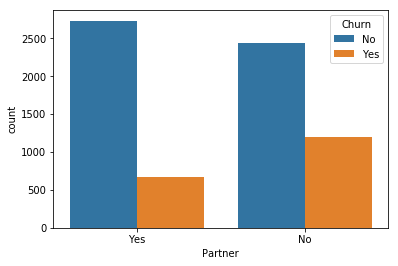

In [27]:
print(df.groupby('Churn')['Partner'].value_counts())
k=(df.groupby('Churn')['Partner'].value_counts()['Yes']['Yes'])*100/(df.groupby('Churn')['Partner'].value_counts()['No']['Yes'])
print('%  Customers with Partner that stay after 1 month = ',100-k)
sns.countplot(df.Partner, hue = df.Churn)

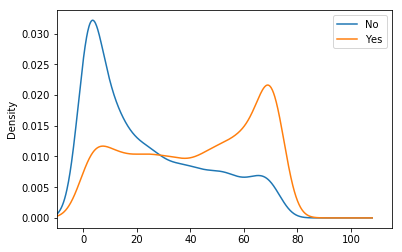

In [64]:
df.groupby('Partner')['tenure'].plot(kind='density',xlim=-10)
plt.legend()

# Customers with a Partner have a lower churn rate AND remain as a customer for a longer tenure

# Churn VS TechSupport

Churn  TechSupport
No     No             3440
       Yes            1734
Yes    No             1559
       Yes             310
Name: TechSupport, dtype: int64


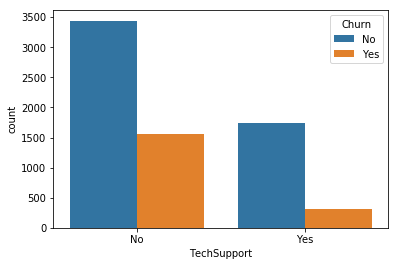

In [29]:
#print(df.groupby('Churn')['TechSupport'].value_counts().plot(kind='barh'))
df['TechSupport']=df['TechSupport'].replace('No internet service','No')

sns.countplot(df.TechSupport, hue = df.Churn)
print(df.groupby('Churn')['TechSupport'].value_counts())

# We see that TechSupport plays a major role on churn rate, Customers with TechSupport has lower churn rate

# Churn VS Contract

Churn  Contract      
No     Month-to-month    2220
       Two year          1647
       One year          1307
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: Contract, dtype: int64


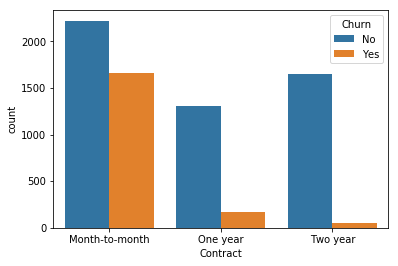

In [30]:
#print(df.groupby('Churn')['Contract'].value_counts().plot(kind='pie'))
#print(df.groupby('Churn')['Contract'].value_counts()['Yes'].plot(kind='bar'))
#print(df.groupby('Churn')['Contract'].value_counts()['No'].plot(kind='bar'))
sns.countplot(df.Contract, hue = df.Churn)
print(df.groupby('Churn')['Contract'].value_counts())

# Customers with 2 years Contract have a lower Churn Rate

# Churn VS MonthlyCharges

In [53]:

print(df.where(df['Churn']=='Yes')['MonthlyCharges'].median())
print(df.where(df['Churn']=='No')['MonthlyCharges'].median())
print(df.where(df['Churn']=='Yes')['MonthlyCharges'].mean())
print(df.where(df['Churn']=='No')['MonthlyCharges'].mean())



79.65
64.42500000000001
74.4413322632423
61.2651236953999


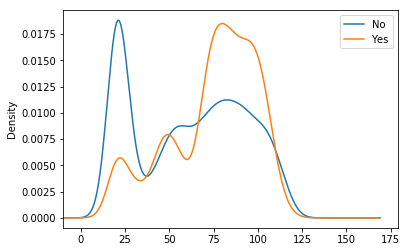

In [65]:
df.groupby('Churn')['MonthlyCharges'].plot(kind='density',xlim=-10)
plt.legend()

# Customers with high monthly charges show greater churn rate , may get attracted to lower offers from competitor

# Churn VS Tenure

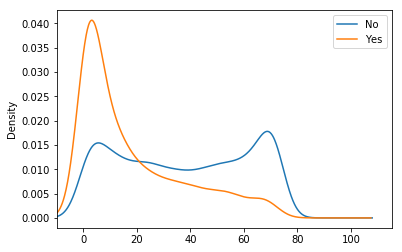

In [62]:
df.groupby('Churn')['tenure'].plot(kind='density',xlim=-10)
plt.legend()

# Newer Customers have higher churn rate 

# Churn VS Streaming

Churn  StreamingMovies    
No     Yes                    1914
       No                     1847
       No internet service    1413
Yes    No                      938
       Yes                     818
       No internet service     113
Name: StreamingMovies, dtype: int64
% churn  =  29.94143484626647


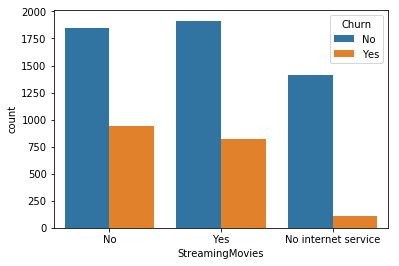

In [32]:

sns.countplot(df.StreamingMovies, hue = df.Churn)
print(df.groupby('Churn')['StreamingMovies'].value_counts())
k=(df.groupby('Churn')['StreamingMovies'].value_counts()['Yes']['Yes'])*100/(df.groupby('Churn')['StreamingMovies'].value_counts()['No']['Yes']+df.groupby('Churn')['StreamingMovies'].value_counts()['Yes']['Yes'])
print('% churn  = ',k)

Churn  StreamingTV        
No     Yes                    1893
       No                     1868
       No internet service    1413
Yes    No                      942
       Yes                     814
       No internet service     113
Name: StreamingTV, dtype: int64


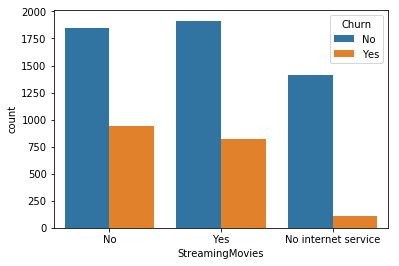

In [33]:

sns.countplot(df.StreamingMovies, hue = df.Churn)
print(df.groupby('Churn')['StreamingTV'].value_counts())


# Movie and TV streaming have similar Churn rates, 30% customers that have streaming leave the company 

# Churn VS Billing

Churn  PaperlessBilling
No     Yes                 2771
       No                  2403
Yes    Yes                 1400
       No                   469
Name: PaperlessBilling, dtype: int64


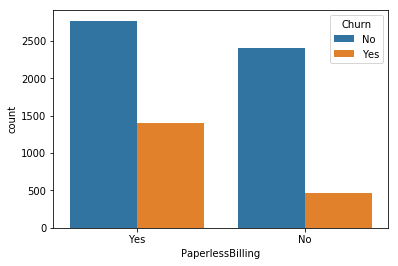

In [34]:

sns.countplot(df.PaperlessBilling, hue = df.Churn)
print(df.groupby('Churn')['PaperlessBilling'].value_counts())

# Paperless Billing shows a high churn rate

Churn  PaymentMethod            
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
Name: PaymentMethod, dtype: int64


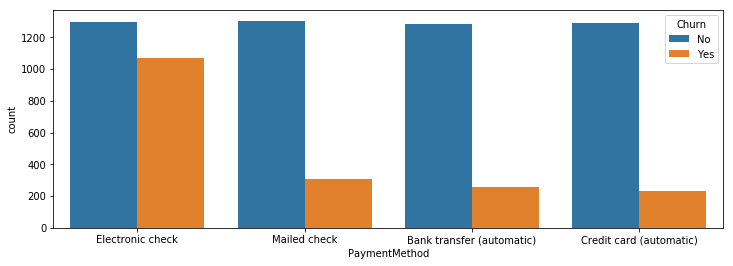

In [35]:
plt.figure(figsize=(12,4))
sns.countplot(df.PaymentMethod, hue = df.Churn)
print(df.groupby('Churn')['PaymentMethod'].value_counts())

# Customers with Electronic check Payment method show high Churn rate

# Churn VS Senior Citizens

Churn  SeniorCitizen
No     No               4508
       Yes               666
Yes    No               1393
       Yes               476
Name: SeniorCitizen, dtype: int64
% churn  =  41.68126094570928


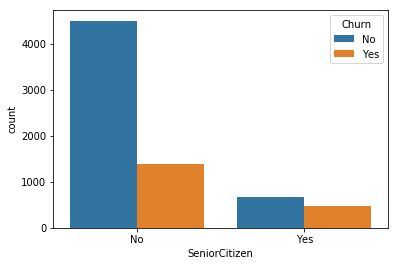

In [36]:
sns.countplot(df.SeniorCitizen, hue = df.Churn)
print(df.groupby('Churn')['SeniorCitizen'].value_counts())
k=(df.groupby('Churn')['SeniorCitizen'].value_counts()['Yes']['Yes'])*100/(df.groupby('Churn')['SeniorCitizen'].value_counts()['No']['Yes']+df.groupby('Churn')['SeniorCitizen'].value_counts()['Yes']['Yes'])
print('% churn  = ',k)

# Senior Customers show a high Churn Rate of 41.68%

# Churn VS Online Backup

Churn  OnlineBackup       
No     Yes                    1906
       No                     1855
       No internet service    1413
Yes    No                     1233
       Yes                     523
       No internet service     113
Name: OnlineBackup, dtype: int64
% churn  =  39.92875647668394


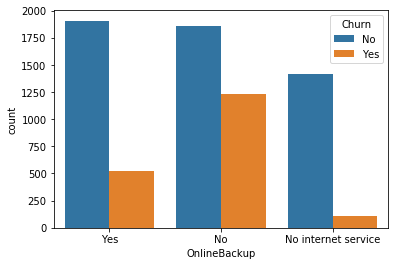

In [37]:
sns.countplot(df.OnlineBackup, hue = df.Churn)
print(df.groupby('Churn')['OnlineBackup'].value_counts())
k=(df.groupby('Churn')['OnlineBackup'].value_counts()['Yes']['No'])*100/(df.groupby('Churn')['OnlineBackup'].value_counts()['No']['No']+df.groupby('Churn')['OnlineBackup'].value_counts()['Yes']['No'])
print('% churn  = ',k)


#  Customers without Online Backup show high Churn rate

# Churn VS Device Protection

Churn  DeviceProtection   
No     No                     1884
       Yes                    1877
       No internet service    1413
Yes    No                     1211
       Yes                     545
       No internet service     113
Name: DeviceProtection, dtype: int64
% churn  =  39.12762520193861


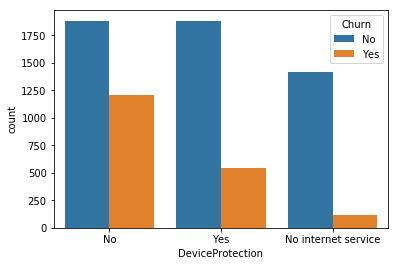

In [38]:
sns.countplot(df.DeviceProtection, hue = df.Churn)
print(df.groupby('Churn')['DeviceProtection'].value_counts())
k=(df.groupby('Churn')['DeviceProtection'].value_counts()['Yes']['No'])*100/(df.groupby('Churn')['DeviceProtection'].value_counts()['No']['No']+df.groupby('Churn')['DeviceProtection'].value_counts()['Yes']['No'])
print('% churn  = ',k)


# Customers without Device Protection have high churn rate

# Churn VS Online Security

Churn  OnlineSecurity     
No     No                     2037
       Yes                    1724
       No internet service    1413
Yes    No                     1461
       Yes                     295
       No internet service     113
Name: OnlineSecurity, dtype: int64
% churn  =  41.76672384219554


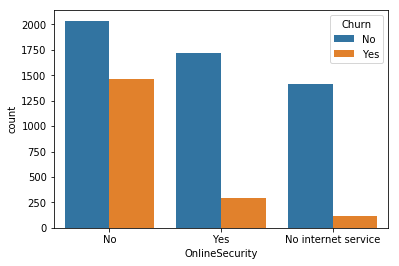

In [39]:
sns.countplot(df.OnlineSecurity, hue = df.Churn)
print(df.groupby('Churn')['OnlineSecurity'].value_counts())
k=(df.groupby('Churn')['OnlineSecurity'].value_counts()['Yes']['No'])*100/(df.groupby('Churn')['OnlineSecurity'].value_counts()['No']['No']+df.groupby('Churn')['OnlineSecurity'].value_counts()['Yes']['No'])
print('% churn  = ',k)

# Customers Without online security have high churn rate

# Churn VS Multiple Lines

Churn  MultipleLines   
No     No                  2541
       Yes                 2121
       No phone service     512
Yes    Yes                  850
       No                   849
       No phone service     170
Name: MultipleLines, dtype: int64


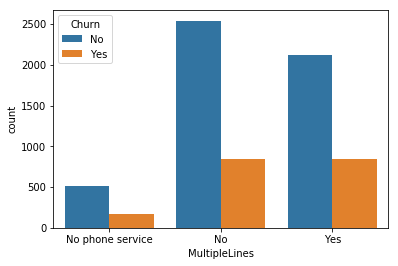

In [40]:
sns.countplot(df.MultipleLines, hue = df.Churn)
print(df.groupby('Churn')['MultipleLines'].value_counts())

# No correlation between churn and Multiple Lines

# .........................................................................................

# CONCLUSIONS

# *From churn vs gender, its found that there is no correlation between churn and gender ( Churn of M and F are almost the same)
# *Customers with and without Phone Service have similar Churn Rate
# *84.54% Customers with Dependents stay for the next month
# *FiberOptic Service has highest churn rate
# *Customers with a Partner have a lower churn rate AND remain as a customer for a longer tenure
# *We see that TechSupport plays a major role on churn rate, Customers with TechSupport has lower churn rate
# *Customers with 2 years Contract have a lower Churn Rate
# *Customers that Churn have Higher Monthly Charges, may get attracted to lower offers to rival companies
# *Newer customers have higher churn rate
# *Movie and TV streaming have similar Churn rates, 30% customers that have streaming leave the company
# *Paperless Billing show a high churn rate
# *Customers with Electronic check Payment method show high Churn rate
# *Senior Customers show a high Churn Rate of 41.68%
# *Customers without Online Backup show high Churn rate
# *Customers without Device Protection have high churn rate
# *Customers Without online security have high churn rate
# *No correlation between churn and Multiple Lines


